In [ ]:
import numpy as np
from collections import Counter

class KNN():
    
    def __init__(self):
        pass

    def train(self, X, y):##KNN is just a lazy learner
        self.X_train = X
        self.y_train = y

    def predict(self, X, k):
        dists = self.compute_distances(X)
        # print("computed distances")

        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            # find k nearest lables
            k_closest_y = labels[:k]

            
            c = Counter(k_closest_y)##majority vote
            y_pred[i] = c.most_common(1)[0][0] ## takes out the label of the majority vote

        return(y_pred)

    def compute_distances(self, X): ## just a cool trick to avoid loop to calculate euclidean distance
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)

        return(dists)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('sample_data/mnist_train_small.csv')
test=pd.read_csv('sample_data/mnist_test.csv')

df = pd.DataFrame(train)

dff = pd.DataFrame(test)

##extracting y out of dataset
y_train=df.iloc[:,0]
y_test=dff.iloc[:,0]

##extracting x out of dataset
x_train=df.drop(df.columns[0], axis=1)
x_test=dff.drop(dff.columns[0], axis=1)


##converting dataframe to numpy array
x_train.to_numpy()
x_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

##normalise x
x_train=x_train/255.0
x_test=x_test/255.0

##y_train=pd.get_dummies(y_train).values
x_train=x_train.values
x_test=x_test.values
y_train=y_train.values
y_test=y_test.values


In [ ]:
x_train.shape, y_train.shape, x_test.shape

((19999, 784), (19999,), (9999, 784))

In [ ]:
import time
# predict labels for batch_size number of test images at a time.
batch_size = 2000
# k = 3
kval = [1,3,5,7,9,11,13,15]
classifier =KNN()
classifier.train(x_train, y_train)
accuracy=[]
for k in kval:
  predictions = []
  
  for i in range(5):
    # predicts from i * batch_size to (i+1) * batch_size
    print("Computing batch " + str(i+1) + "/" + str(5) + "...")
    tic = time.time()
    predts = classifier.predict(x_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
#     print("Len of predictions: " + str(len(predictions)))
    print("Completed this batch in " + str(toc-tic) + " Secs.")
  predictions = np.array(predictions).astype(np.int)
  print("Completed predicting the test data foor k = "+str(k))

  acc=np.sum(predictions == y_test)/len(y_test)
  accuracy.append(acc)



Computing batch 1/5...
Completed this batch in 5.406001567840576 Secs.
Computing batch 2/5...
Completed this batch in 5.347651481628418 Secs.
Computing batch 3/5...
Completed this batch in 5.293500185012817 Secs.
Computing batch 4/5...
Completed this batch in 5.286611557006836 Secs.
Computing batch 5/5...
Completed this batch in 5.278253555297852 Secs.
Completed predicting the test data foor k = 1
Computing batch 1/5...
Completed this batch in 5.316155195236206 Secs.
Computing batch 2/5...
Completed this batch in 5.321631908416748 Secs.
Computing batch 3/5...
Completed this batch in 5.312966585159302 Secs.
Computing batch 4/5...
Completed this batch in 5.299370527267456 Secs.
Computing batch 5/5...
Completed this batch in 5.313404560089111 Secs.
Completed predicting the test data foor k = 3
Computing batch 1/5...
Completed this batch in 5.307012557983398 Secs.
Computing batch 2/5...
Completed this batch in 5.292776584625244 Secs.
Computing batch 3/5...
Completed this batch in 5.3237364

In [ ]:
accuracy=np.array(accuracy)
accuracy=accuracy*100

In [ ]:
accuracy

array([95.81958196, 96.04960496, 95.96959696, 95.87958796, 95.77957796,
       95.50955096, 95.36953695, 95.28952895])

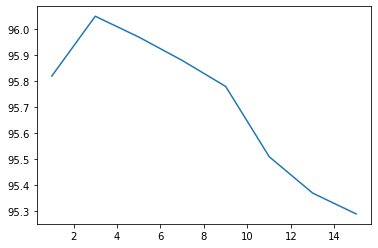

In [ ]:
plt.plot(kval,(accuracy))